In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
air=pd.read_excel("C:\\Users\\prasa\\Downloads\\Airlines+Data.xlsx")
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
air.describe

<bound method NDFrame.describe of         Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]>

In [8]:
air.duplicated().values.any()

False

In [9]:
air.isnull().values.any()

False

<AxesSubplot:>

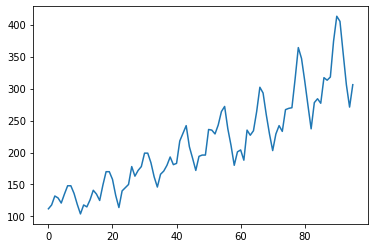

In [10]:
air.Passengers.plot()

C:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Passengers', ylabel='Density'>

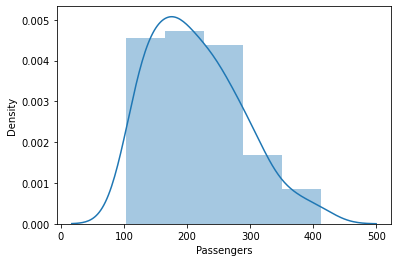

In [11]:
sns.distplot(air['Passengers'], bins=5)

In [12]:
air['Month'] = pd.to_datetime(air['Month'])
air['Months'] = air['Month'].dt.strftime('%b')
air.head()

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


In [13]:
dummy = pd.DataFrame(pd.get_dummies(air['Months']))
airline = pd.concat([air,dummy],axis = 1)
airline.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [14]:
t = np.arange(1,97)

In [15]:
airline['t']=t
airline['t_square']=airline['t']*airline['t']
log_Passengers = np.log(airline['Passengers'])
airline['log_Passengers']=log_Passengers

In [16]:
airline.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [18]:
## Splitting the Data
train=airline.head(76)
test=airline.tail(20)

##### Linear Model

In [20]:
import statsmodels.formula.api as smf
linear_model = smf.ols("Passengers~t", data= train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers']) - np.array(pred_linear))**2))
rmse_linear

57.00014788256584

##### Exponential Model

In [23]:
Exp = smf.ols('log_Passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.62154394719377

##### Quadratic Model

In [26]:
quad = smf.ols('Passengers~t+t_square', data= train).fit()
pred_quad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmse_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2))
rmse_quad

58.494274639472664

##### Additive seasonality

In [27]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data = train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea =  np.sqrt(np.mean((np.array(test['Passengers']) - np.array(pred_add_sea))**2))
rmse_add_sea

132.25413439949477

##### Additive Seasonality Quadratic

In [29]:
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

39.759766338062825

##### Multiplicative seasonality

In [30]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.61090856256493

##### Multiplicative additive seasonality

In [31]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.78425017887204

In [34]:
# Compare the Results
models = {'Model': pd.Series(["rmse_linear","rmse_Exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]), 'RMSE_Values': pd.Series([rmse_linear,rmse_Exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(models)
table_rmse

,Model,RMSE_Values
0,rmse_linear,57.000148
1,rmse_Exp,46.621544
2,rmse_quad,58.494275
3,rmse_add_sea,132.254134
4,rmse_add_sea_quad,39.759766
5,rmse_Mult_sea,137.610909
6,rmse_Mult_add_sea,11.784250


#### Multiplicative additive seasonality has low RMSE, so it is the best model.